In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gaussian_rbf(x, landmark, gamma=1):
    """Gaussian Radial Basis Function"""
    return np.exp(-gamma * np.linalg.norm(x - landmark)**2)

In [3]:
def end_to_end(X1, X2, ys, mu1, mu2):
    """Perform end-to-end RBF transformation and linear separation"""
    from_1 = [gaussian_rbf(i, mu1) for i in zip(X1, X2)]
    from_2 = [gaussian_rbf(i, mu2) for i in zip(X1, X2)]

    # Plot original and transformed data
    plt.figure(figsize=(13, 5))
    plt.subplot(1, 2, 1)
    plt.scatter((X1[0], X1[3]), (X2[0], X2[3]), label="Class_0")
    plt.scatter((X1[1], X1[2]), (X2[1], X2[2]), label="Class_1")
    plt.xlabel("$X1$", fontsize=15)
    plt.ylabel("$X2$", fontsize=15)
    plt.title("Xor: Linearly Inseparable", fontsize=15)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(from_1[0], from_2[0], label="class_0")
    plt.scatter(from_1[1], from_2[1], label="class_1")
    plt.scatter(from_1[2], from_2[2], label="class_1")
    plt.scatter(from_1[3], from_2[3], label="class_0")
    plt.plot([0, 0.95], [0.95, 0], "k--")
    plt.annotate("Separating hyperplane", xy=(0.4, 0.55), xytext=(0.55, 0.66),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    plt.xlabel(f"$mu1$: {mu1}", fontsize=15)
    plt.ylabel(f"$mu2$: {mu2}", fontsize=15)
    plt.title("Transformed Inputs: Linearly Separable", fontsize=15)
    plt.legend()

    # Solve using matrix operations: AW = Y
    A = []
    for i, j in zip(from_1, from_2):
        temp = [i, j, 1]  # Include bias term
        A.append(temp)

    A = np.array(A)
    W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
    print("Model predictions:", np.round(A.dot(W)))
    print("True labels:", ys)
    print(f"Weights: {W}")
    return W



In [4]:
def predict_matrix(point, weights):
    """Make predictions using learned weights"""
    gaussian_rbf_0 = gaussian_rbf(np.array(point), mu1)
    gaussian_rbf_1 = gaussian_rbf(np.array(point), mu2)
    A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])  # Include bias term
    return np.round(A.dot(weights))

In [5]:

# XOR problem data points
x1 = np.array([0, 0, 1, 1])  # Feature 1
x2 = np.array([0, 1, 0, 1])  # Feature 2
ys = np.array([0, 1, 1, 0])  # XOR labels (0, 1, 1, 0)


In [6]:
# RBF centers
mu1 = np.array([0, 1])  # Center 1
mu2 = np.array([1, 0])  # Center 2

Model predictions: [0. 1. 1. 0.]
True labels: [0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]

Test Predictions:
Input: [0 0], Predicted: 0.0
Input: [0 1], Predicted: 1.0
Input: [1 0], Predicted: 1.0
Input: [1 1], Predicted: 0.0


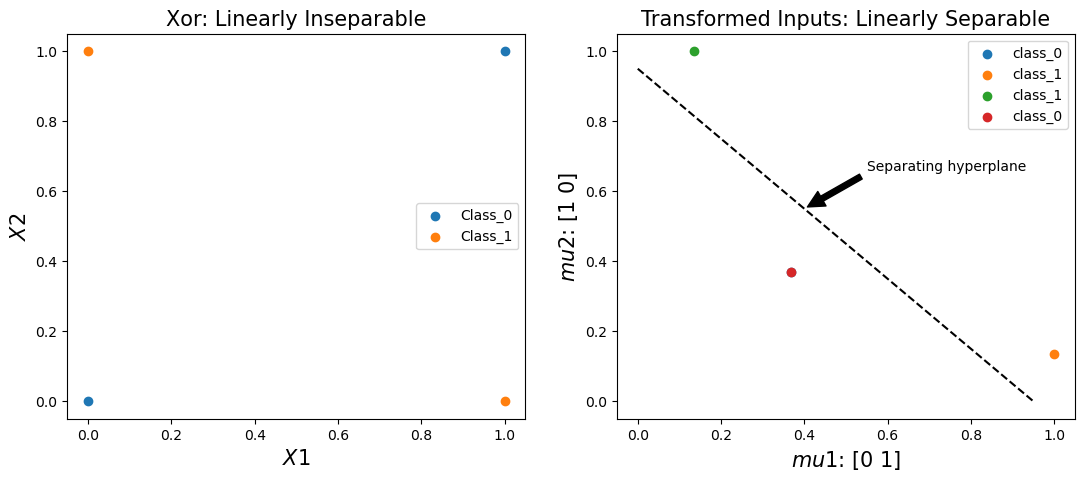

In [7]:
# Train model and get weights
w = end_to_end(x1, x2, ys, mu1, mu2)

# Test predictions
print("\nTest Predictions:")
print(f"Input: {np.array([0, 0])}, Predicted: {predict_matrix(np.array([0, 0]), w)}")
print(f"Input: {np.array([0, 1])}, Predicted: {predict_matrix(np.array([0, 1]), w)}")
print(f"Input: {np.array([1, 0])}, Predicted: {predict_matrix(np.array([1, 0]), w)}")
print(f"Input: {np.array([1, 1])}, Predicted: {predict_matrix(np.array([1, 1]), w)}")